## Data Visualization

In [1]:
import pandas as pd

matlab plotting library
!pip3 install matplotlib

In [4]:
nyc = pd.read_csv('Files/AB_NYC_2019.csv')

In [7]:
nyc = nyc[['name', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [8]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(

In [15]:
#nyc.groupby('neighbourhood_group')['price'].mean().plot(kind = 'bar');
mean_price_ngroup = nyc.groupby('neighbourhood_group')['price'].mean()

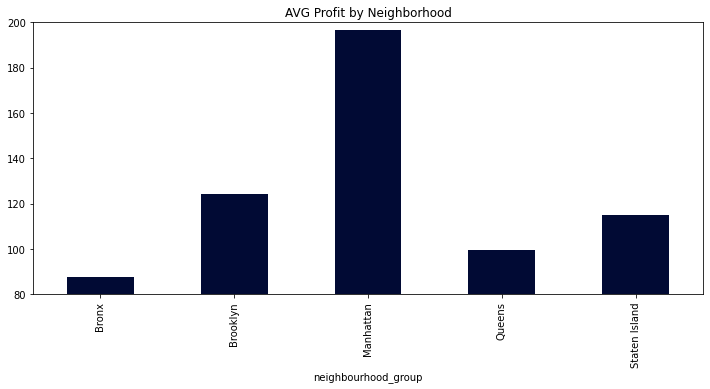

In [32]:
mean_price_ngroup.plot.bar(figsize = (12, 5), 
                           title = 'AVG Profit by Neighborhood', 
                           color = '#010A34',
                          ylim = (80, 200));

<AxesSubplot:xlabel='neighbourhood_group,room_type'>

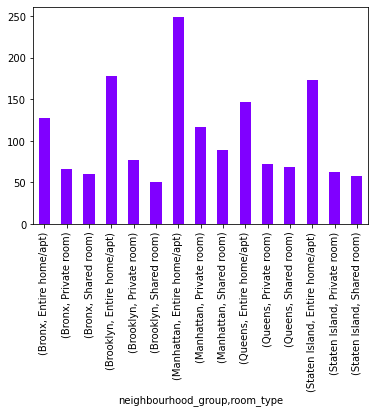

In [37]:
nyc.groupby(['neighbourhood_group', 'room_type'])['price'].mean().plot.bar(cmap = 'rainbow')

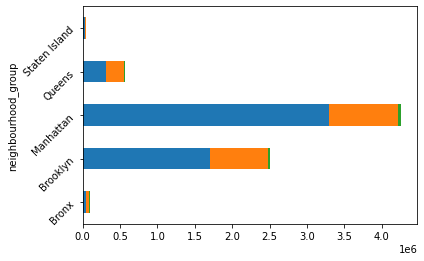

In [69]:
nyc.pivot_table(index = 'neighbourhood_group', 
                columns = 'room_type',
               values = 'price',
               aggfunc = 'sum').plot(kind = 'barh', ylabel = 'Avg Price', stacked = True, legend = False, rot = 45);

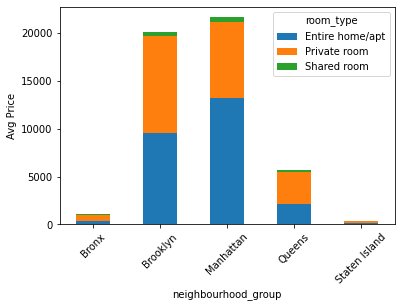

In [74]:
nyc.pivot_table(index = 'neighbourhood_group', 
                columns = 'room_type',
               values = 'price',
               aggfunc = 'count').plot(kind = 'bar', 
                                     ylabel = 'Avg Price', 
                                     stacked = True, 
                                     rot = 45);

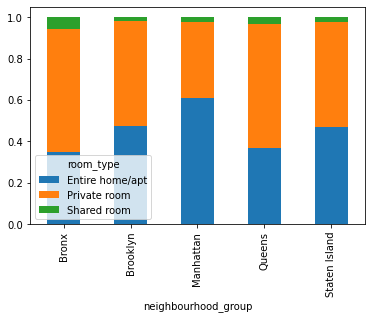

In [90]:
prices = nyc.pivot_table(index = 'neighbourhood_group', 
                columns = 'room_type',
               values = 'price',
               aggfunc = 'count')
prices.div(prices.sum(axis = 1), axis = 0).plot.bar(stacked = True);

In [81]:
nyc.pivot_table(index = 'neighbourhood_group', 
                columns = 'room_type',
               values = 'price',
               aggfunc = 'count', margins = True)

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,379,652,60,1091
Brooklyn,9559,10132,413,20104
Manhattan,13199,7982,480,21661
Queens,2096,3372,198,5666
Staten Island,176,188,9,373
All,25409,22326,1160,48895


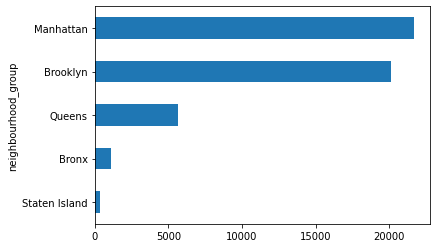

In [103]:
nyc.groupby('neighbourhood_group').size().sort_values().plot.barh();

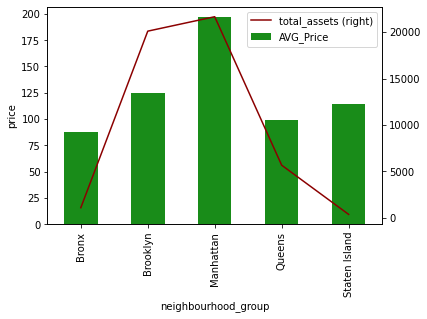

In [131]:
df = nyc.groupby('neighbourhood_group').agg(AVG_Price = ('price', 'mean'),
                                            total_assets = ('name', 'count'))

df['total_assets'].plot.line(secondary_y = True, legend = True, color = 'darkred', ylabel = 'Asset_Amount');
df['AVG_Price'].plot.bar(legend = True, color = 'green', alpha = 0.9, ylabel = 'price');

In [135]:
nyc.groupby(['neighbourhood_group', 'room_type']).size().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


In [134]:
nyc.pivot_table(index = 'neighbourhood_group', columns = 'room_type', aggfunc = 'size')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


## Histograms

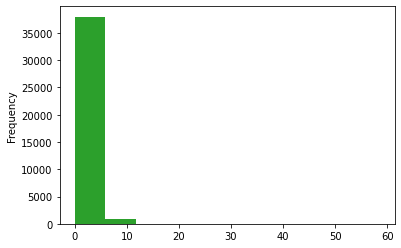

In [143]:
nyc['reviews_per_month'].hist();
nyc['reviews_per_month'].plot.hist();
nyc['reviews_per_month'].plot(kind = 'hist');

In [147]:
nyc.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

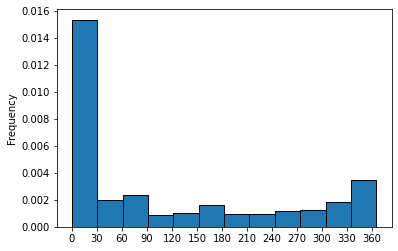

In [164]:
nyc['availability_365'].plot.hist(grid = False,
                            edgecolor = 'black',
                            bins = 12,
                            xticks = range(0, 365, 30),
                                 density = True,
                                 );

In [176]:
nyc[['number_of_reviews']].query('number_of_reviews < 10')

,number_of_reviews
0,9
2,0
4,9
19,0
20,9
...,...
48890,0
48891,0
48892,0
48893,0


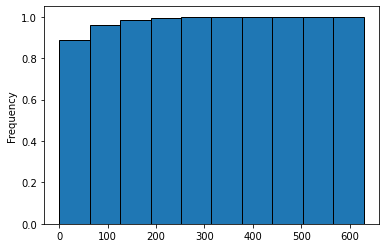

In [183]:
nyc['number_of_reviews'].plot.hist(edgecolor = 'black',
                                  cumulative = True,
                                  density = True);

In [186]:
nyc.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

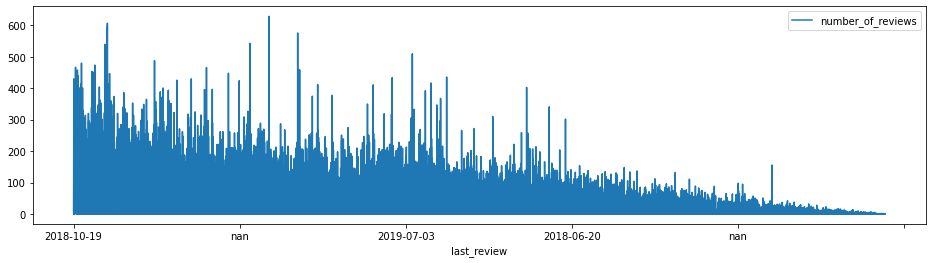

In [189]:
nyc[['last_review', 'number_of_reviews']].plot.line(x = 'last_review', y = 'number_of_reviews', figsize = (16,4));

In [193]:
nyc['last_review'] = pd.to_datetime(nyc['last_review'])

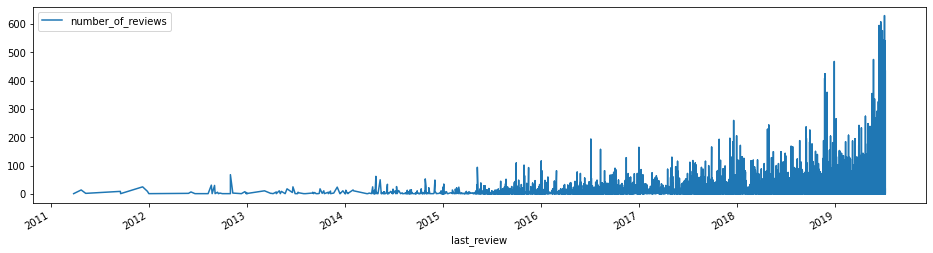

In [195]:
nyc[['last_review', 'number_of_reviews']].plot.line(x = 'last_review', y = 'number_of_reviews', figsize = (16,4));

<AxesSubplot:xlabel='last_review'>

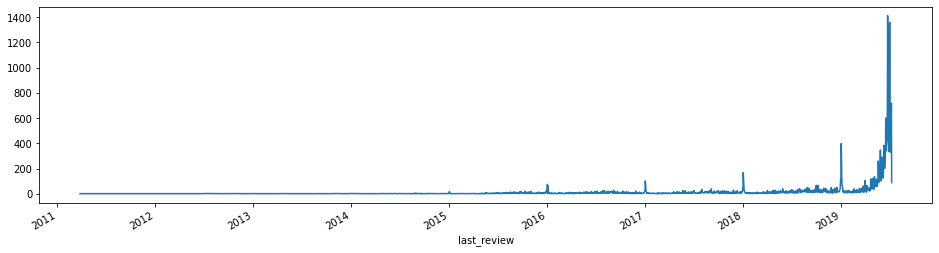

In [198]:
nyc.groupby('last_review').size().plot(figsize = (16,4))

In [ ]:
nyc['last_review'] = nyc['last_review'].astype('datetime64')

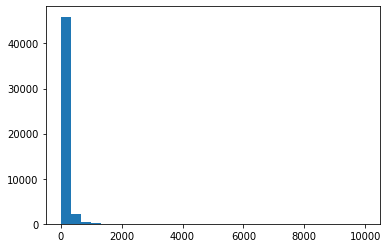

In [146]:
nyc['price'].hist(bins = 30, grid = False);

## Scatter Plots

In [200]:
nyc.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [201]:
nyc.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaT,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


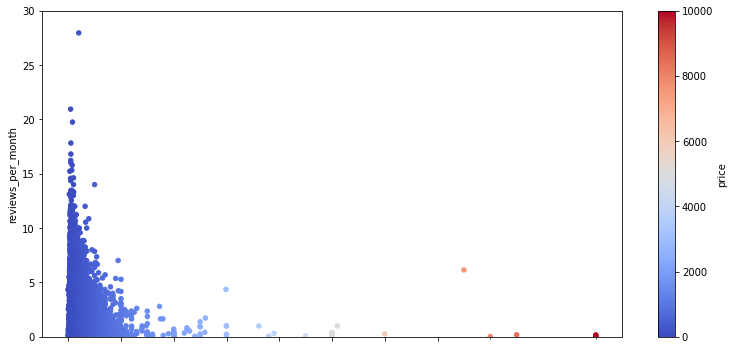

In [236]:
nyc.plot.scatter(x = 'price', 
                 y = 'reviews_per_month', 
            #    xlim = (0,4000),
               ylim = (0, 30),
                figsize = (13,6),
                c = 'price',
              cmap = 'coolwarm',
                xlabel = 'price',
                xticks = range(0 ,8000, 1000));

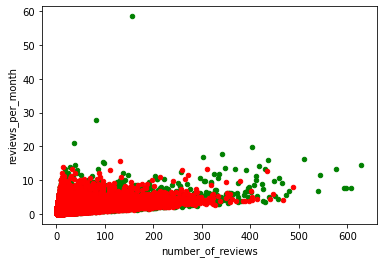

In [253]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(nrows=1, ncols=1)

nyc.query('room_type == "Private room"').plot.scatter(x = 'number_of_reviews', y = 'reviews_per_month', c = 'green', ax = axes);
nyc.query('room_type == "Entire home/apt"').plot.scatter(x = 'number_of_reviews', y = 'reviews_per_month', c = 'red', ax = axes);

In [256]:
nyc.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Conditional Formatting

In [276]:
rev = nyc.pivot_table(index = ['neighbourhood_group', 'neighbourhood'], columns = 'room_type', values = 'number_of_reviews')

In [267]:
rev.style.highlight_max(axis = 0)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [270]:
rev.style.highlight_between(left = 25,right = 30, color = '#387534')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [271]:
rev.style.highlight_max(axis = None, color = 'green').highlight_min(color = 'red', axis = None)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [274]:
rev.style.bar(axis = 1)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,30.678100,25.018405,7.200000
Brooklyn,27.945183,21.086952,14.026634
Manhattan,17.815516,26.202706,21.400000
Queens,28.933206,27.746441,13.863636
Staten Island,33.278409,30.159574,1.555556


In [289]:
rev.fillna(0).head(50).style.background_gradient('coolwarm_r').format('{:,.2f}%')

In [292]:
nyc.corr()style.background_gradient()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000
